# ANSWER 1

Delhi NCR count =  7947
Rest of India =  705


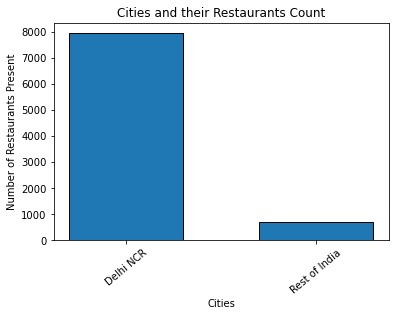

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
data=pd.read_csv("zomato.csv", encoding='latin1')
data=data[data['Country Code']==1]


# PART 1

city_data=data.City
city_data.dropna(inplace=True)
array=city_data.copy()
new_city_array=array[(city_data=='New Delhi')|(city_data=='Ghaziabad')|(city_data=='Noida')|(city_data=='Gurgaon')|(city_data=='Faridabad')]
required_count=new_city_array.shape[0]
other_count=city_data.shape[0]-new_city_array.shape[0]
print("Delhi NCR count = ",required_count)
print("Rest of India = ",other_count)
x=["Delhi NCR","Rest of India"]
y=[required_count,other_count]
plt.bar(x,y,width=0.6,edgecolor="black")
plt.xlabel("Cities")
plt.ylabel("Number of Restaurants Present")
plt.title("Cities and their Restaurants Count")
plt.xticks(rotation=40)
plt.show()
# plt.savefig('z1.png')



In [48]:
# PART 2

delhi=[]
other=[]
def f(s):
    global delhi;
    s=str(s)
    s=s.split(',')
    for i in s:
        delhi.append(i.strip())
def f1(s):
    global other
    s=str(s)
    s=s.split(',')
    for i in s:
        other.append(i.strip())
a=data.copy()
non_delhi_data=a[(a.City!='New Delhi')&(a.City!='Ghaziabad')&(a.City!='Noida')&(a.City!='Gurgaon')&(a.City!='Faridabad')]
delhi_data=a[(a.City=='New Delhi')|(a.City=='Ghaziabad')|(a.City=='Noida')|(a.City=='Gurgaon')|(a.City=='Faridabad')]
city_array=non_delhi_data.Cuisines.apply(f1)
city_array1=delhi_data.Cuisines.apply(f)
delhi_set=set(delhi)
other_set=set(other)
for i in other_set:
    if(i not in delhi_set):
        print(i)
        

German
BBQ
Cajun
Malwani


In [50]:
# PART 2 : CHECKING USING ZOMATO API

lat=[[28.5355, 77.3910],[28.4595, 77.0266],[28.4089, 77.3178],[28.6692, 77.4538],[28.6139, 77.2090]] 
d1=[]
for i in range(5):
    data=requests.get('https://developers.zomato.com/api/v2.1/cuisines?lat='+str(lat[i][0])+'&lon='+str(lat[i][1]),headers={'user-key':'153140bb33b4c46aeb1acbd4d544fb74'}).json()
    for i in data['cuisines']:
        d1.append(i['cuisine']['cuisine_name'])
for i in other_set:
    if(i not in d1):
        print(i)

German
Indian
Cajun
Charcoal Grill


In [51]:
# Part 3
data1=pd.Series(delhi).value_counts()
data2=pd.Series(other).value_counts()
print("------FOR REST CITIES-----------")
for i in range(10):
    print(data2.index[i]," "*(20-len(data2.index[i])),data2.values[i])
print("")
print("-------Delhi NCR----------")
for i in range(10):
    print(data1.index[i]," "*(20-len(data1.index[i])),data1.values[i])


------FOR REST CITIES-----------
North Indian          349
Chinese               242
Continental           177
Italian               147
Cafe                  136
Fast Food             97
South Indian          62
Mughlai               59
Desserts              55
Mexican               50

-------Delhi NCR----------
North Indian          3597
Chinese               2448
Fast Food             1866
Mughlai               933
Bakery                697
South Indian          569
Continental           547
Desserts              542
Street Food           538
Italian               535


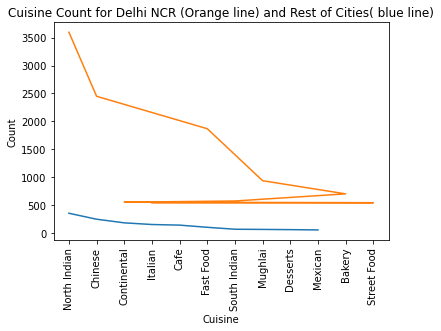

In [58]:
# Part 4
a1=[]
b1=[]
for i in range(10):
    a1.append(data2.index[i])
    b1.append(data2.values[i])
# print(a1,b1)
a2=[]
b2=[]
for i in range(10):
    a2.append(data1.index[i])
    b2.append(data1.values[i])
# For delhi region :Orange line
plt.plot(a1,b1,'-')
plt.plot(a2,b2,'-')
plt.ylabel("Count")
plt.xlabel("Cuisine")
plt.title("Cuisine Count for Delhi NCR (Orange line) and Rest of Cities( blue line)")
# For rest of the cities :Blue lines
plt.xticks(rotation=90)
plt.show()

# Answer 2

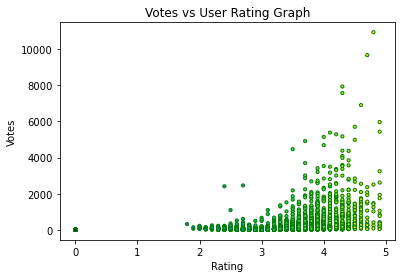

In [82]:
#part 1) 1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
original_data=pd.read_csv("zomato.csv", encoding='latin1')
original_data=original_data[original_data['Country Code']==1]
data=original_data.copy()
x=data["Aggregate rating"]
y=data.Votes
# plt.plot(rating,votes,"^")
plt.scatter(x,y,c=x,marker='.',s=40,edgecolor='green')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title("Votes vs User Rating Graph")
plt.show()

8


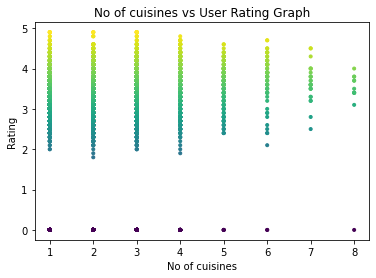

In [61]:
#part 1) 2)
def fun1(s):
    size=len((str(s)).split(","))
    return size
data=original_data.copy()

x=data.Cuisines.apply(fun1)
y=data["Aggregate rating"]
print(x.max())
plt.scatter(x,y,c=y,marker='.')
# plt.plot(x,y,".")
plt.xlabel('No of cuisines')
plt.ylabel('Rating')
plt.title("No of cuisines vs User Rating Graph")
plt.show()

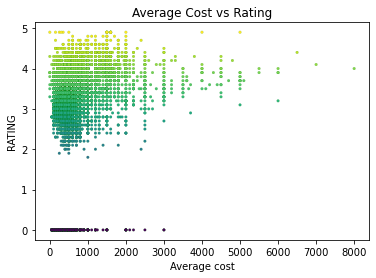

In [63]:
# PART 1) 3)
d={1:1,
   14:52.41,
   30:12.98,
   37:55.93,
   94:0.0051,
   148:49.31,
   162:1.54,
   166:20.47,
   184:54.56,
   189:4.59,
   191:0.40,
   208:8.93,
   214:20.29,
   215:96.47,
   216:74.54
  }

count=0
def fun2(s):
    global count
    code=data["Country Code"].iloc[count]
    global d
    price=d[code]
    s=s*price
    count=count+1
    return s
average_price=data["Average Cost for two"].apply(fun2)
y=data["Aggregate rating"]
plt.scatter(average_price,y,c=y,marker=".",s=30,edgecolor='green',linewidth=0.1)
plt.ylabel('RATING')
plt.title("Average Cost vs Rating")
plt.xlabel('Average cost')
plt.show()

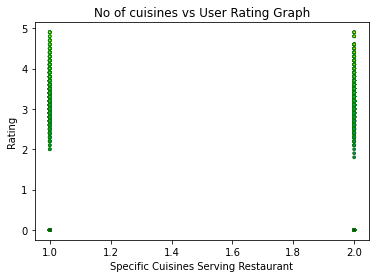

In [64]:
#part 1) 4)
def fun1(s):
    size=len((str(s)).split(","))
    return size
x=data.Cuisines.apply(fun1)
y=data["Aggregate rating"]
x1=x[x<=2]
y1=y[x<=2]
plt.scatter(x1,y1,c=y1,marker='.',s=30,edgecolor='green')
# plt.plot(x,y,".")
plt.xlabel('Specific Cuisines Serving Restaurant')
plt.ylabel('Rating')
plt.title("No of cuisines vs User Rating Graph")
plt.show()

In [79]:
# Part 2
data=original_data.copy()
count=0
def func1(s):
    global count
    n=data["Aggregate rating"].iloc[count]
    count=count+1
    return s*n
data["weight"]=data["Votes"].apply(func1)
# data['weight']=data['Votes']*data['Aggregate rating']
data=data.groupby('Locality').sum()
count=0
def func12(s):
    global count
    n=data["weight"].iloc[count]
    count=count+1
    return n/s

data["final_weight"]=data.Votes.apply(func12)
data.dropna(subset=['final_weight'],inplace=True)
a=data.copy()
a.sort_values('final_weight',ascending=False,inplace=True)
print(a.loc[:,'final_weight'].iloc[0:10])

Locality
Hotel Clarks Amer, Malviya Nagar    4.900000
Aminabad                            4.900000
Friends Colony                      4.886916
Powai                               4.841869
Kirlampudi Layout                   4.820161
Deccan Gymkhana                     4.800000
Express Avenue Mall,  Royapettah    4.800000
Banjara Hills                       4.718762
Sector 5, Salt Lake                 4.707023
Riverside Mall, Gomti Nagar         4.700000
Name: final_weight, dtype: float64


# Answer 3

Cafe Coffee Day   83
Domino's Pizza    79
Subway            63
Green Chick Chop  51
McDonald's        48
Keventers         34
Pizza Hut         29
Giani             29
Baskin Robbins    28
Barbeque Nation   25
Giani's           22
Dunkin' Donuts    22
Barista           22
Costa Coffee      20
Pind Balluchi     20


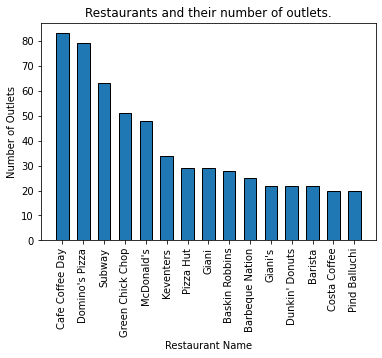

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
original_data=pd.read_csv("zomato.csv", encoding='latin1')
original_data=original_data[original_data['Country Code']==1]

data=original_data.copy()

# PART 1 

a=data['Restaurant Name'].value_counts()[0:15]
a1=[]
b1=[]

for i in range(15):
    a1.append(a.index[i])
    b1.append(a.values[i])
    print(a.index[i]," "*(16-len(a.index[i])),a.values[i])
plt.bar(a1,b1,width=0.6,edgecolor="black")
plt.xticks(rotation=90)
plt.title("Restaurants and their number of outlets.")
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Outlets')
plt.show()

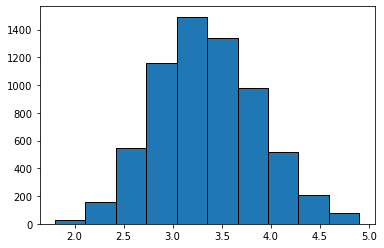

In [86]:
# Part 2
a=data[data["Aggregate rating"]!=0]["Aggregate rating"]
plt.hist(a,edgecolor="black")
plt.show()


Toit (51705)                              10934
Truffles (51040)                          9667
Hauz Khas Social (308322)                 7931
Peter Cat (20404)                         7574
AB's - Absolute Barbecues (56618)         6907
Barbeque Nation (20842)                   5966
Big Brewsky (58882)                       5705
AB's - Absolute Barbecues (94286)         5434
The Black Pearl (54162)                   5385
BarBQ (20870)                             5288


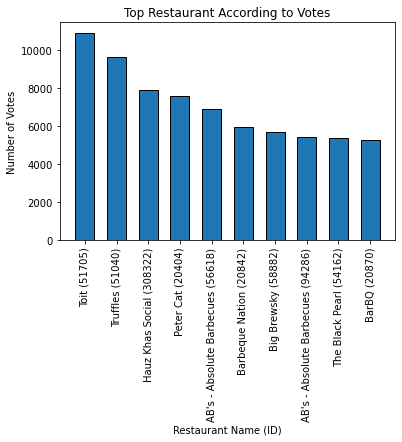

In [91]:
# Part 3
data.sort_values("Votes",ascending=False,inplace=True)
a=[]
b=[]
for i in range(10):
    a.append(data["Restaurant Name"].iloc[i]+" ("+(str(data["Restaurant ID"].iloc[i]))+")")
    b.append(data["Votes"].iloc[i])
    print(data["Restaurant Name"].iloc[i]+" ("+(str(data["Restaurant ID"].iloc[i]))+")",
          " "*(40-len(data["Restaurant Name"].iloc[i]+" ("+(str(data["Restaurant ID"].iloc[i]))+")")),
          data["Votes"].iloc[i])
plt.bar(a,b,width=0.6,edgecolor="black")
plt.xlabel('Restaurant Name (ID)')
plt.ylabel('Number of Votes')
plt.title("Top Restaurant According to Votes")
plt.xticks(rotation=90)
plt.show()

American         112
Seafood          59
Burger           49
Pizza            49
Sandwich         49
Steak            42
Italian          38
Breakfast        37
Mexican          36
Sushi            34


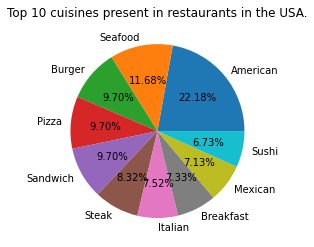

In [93]:
# Part 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
new_data=pd.read_csv("zomato.csv", encoding='latin1')
data=new_data[new_data["Country Code"]==216]
data=data.Cuisines
data.dropna(inplace=True)
array=[]
def function1(s):
    global array
    s=str(s)
    s=s.split(",")
    for i in s:
        array.append(i.strip())

d1=data.apply(function1)
d1=pd.Series(array)
# print(d1)
d1=d1.value_counts()
a=[]
b=[]
for i in range(10):
    a.append(d1.index[i])
    b.append(d1.values[i])
    print(d1.index[i]," "*(15-len(d1.index[i])),d1.values[i])
plt.pie(b,labels=a,autopct="%.2f%%")
plt.title("Top 10 cuisines present in restaurants in the USA.")
plt.show()

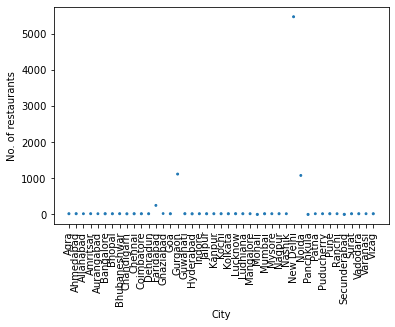

In [40]:
# Part 5
data=original_data.copy()
count=0
def func11(s):
    global count
    n=data["Aggregate rating"].iloc[count]
    count=count+1
    return s*n
data["weight"]=data["Votes"].apply(func1)
# data['weight']=data['Votes']*data['Aggregate rating']
data=data.groupby('City').sum()
count=0
def func12(s):
    global count
    n=data["weight"].iloc[count]
    count=count+1
    return n/s

data["final_weight"]=data.Votes.apply(func12)
data.dropna(subset=['final_weight'],inplace=True)

a=original_data.groupby('City').count().Address
plt.scatter(data["final_weight"].index,a,s=data["final_weight"])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('No. of restaurants')
plt.show()